In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from matplotlib import rc
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")



In [2]:
_METRICS_FILE = './files/benchmark_pool'
_METRIC = 'total_time'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']
classifiers_to_remove = [ 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']

In [3]:
#{k:i+1 for i,k in enumerate(metrics_table.index)}
datasets_dict = {'TwoPatterns': 1,
 'CinCECGtorso': 2,
 'TwoLeadECG': 3,
 'Wafer': 4,
 'FacesUCR': 5,
 'Mallat': 6,
 'FaceAll': 7,
 'Symbols': 8,
 'ItalyPowerDemand': 9,
 'ECG5000': 10,
 'MoteStrain': 11,
 'NonInvasiveFetalECGThorax1': 12,
 'NonInvasiveFetalECGThorax2': 13,
 'SwedishLeaf': 14,
 'FordA': 15,
 'Yoga': 16,
 'UWaveGestureLibraryX': 17,
 'FordB': 18,
 'ElectricDevices': 19,
 'UWaveGestureLibraryY': 20,
 'UWaveGestureLibraryZ': 21,
 'HandOutlines': 22,
 'InsectWingbeatSound': 23,
 'ShapesAll': 24,
 'MedicalImages': 25,
 'PhalangesOutlinesCorrect': 26,
 'ChlorineConcentration': 27,
 'Phoneme': 28}

In [4]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics['instances']>1000]

metrics['timeperinstance'] = metrics['total_time']/metrics['instances']
metrics['minutes'] = metrics['total_time']/60

metrics_table_full_kappa = metrics.pivot(index='dataset',columns='classifier')['kappa']
metrics_table_full_kappa = metrics_table_full_kappa.dropna()
metrics_table_full_kappa = metrics_table_full_kappa.reindex(metrics_table_full_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full_kappa = metrics_table_full_kappa.sort_values(by=list(metrics_table_full_kappa.columns), ascending=False)
metrics_table_full_kappa = metrics_table_full_kappa[metrics_table_full_kappa.columns[0:]]

metrics_table_full = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table_full = metrics_table_full.dropna()
metrics_table_full = metrics_table_full.reindex(metrics_table_full_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full = metrics_table_full.reindex(index=metrics_table_full_kappa.index)
metrics_table_full = metrics_table_full[metrics_table_full.columns[0:]]

metrics_full = metrics.copy()

metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_3_Dilated_Conv_pooling', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier', 'MOA_NaiveBayes'])]


print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time,timeperinstance,minutes
660,FacesUCR,MOA_ASHoeffdingTree,2250,131,14,0.807631,0.777421,0.001146,0.000910,0.002055,0.257816,0.204646,0.462462,0.000206,0.007708
2340,Yoga,MOA_ASHoeffdingTree,3300,426,2,0.552568,0.125778,0.000707,0.000254,0.000961,0.233253,0.083752,0.317005,0.000096,0.005283
2139,UWaveGestureLibraryX,MOA_NaiveBayes,4478,315,8,0.641979,0.568893,0.000085,0.001386,0.001471,0.037935,0.621022,0.658957,0.000147,0.010983
1496,PhalangesOutlinesCorrect,sklearn_MLPClassifier,2648,80,2,0.643446,0.059990,0.000663,0.000122,0.000785,0.175578,0.032438,0.208016,0.000079,0.003467
594,ElectricDevices,keras_parallel_3_Dilated_Conv_pooling,16627,96,7,0.763563,0.694940,0.031752,0.011469,0.043221,52.804281,19.072250,52.804281,0.003176,0.880071
2210,UWaveGestureLibraryZ,MOA_SingleClassifierDrift,4478,315,8,0.584854,0.503895,0.001356,0.001296,0.002652,0.607467,0.580549,1.188016,0.000265,0.019800
2347,Yoga,MOA_LeveragingBag,3300,426,2,0.600928,0.208449,0.017749,0.001496,0.019245,5.857140,0.493722,6.350862,0.001925,0.105848
2077,TwoLeadECG,MOA_LeveragingBag,1162,82,2,0.777411,0.536781,0.003664,0.000986,0.004650,0.428641,0.115412,0.544053,0.000468,0.009068
2154,UWaveGestureLibraryX,keras_parallel_3_Dilated_Conv_pooling,4468,315,8,0.826958,0.786349,0.031650,0.013137,0.044788,14.147663,5.872430,14.147663,0.003166,0.235794
266,CinCECGtorso,sklearn_MLPClassifier,1410,1639,4,0.987237,0.981750,0.007553,0.001112,0.008666,1.065025,0.156854,1.221879,0.000867,0.020365


In [5]:
print(list(metrics_table_full.columns))
print(list(metrics_table_full.index))

['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv_pooling', 'sklearn_MLPClassifier', 'MOA_SingleClassifierDrift', 'MOA_NaiveBayes', 'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_LeveragingBag', 'MOA_RandomHoeffdingTree', 'MOA_OzaBoostAdwin', 'MOA_OzaBoost', 'sklearn_BernoulliNB', 'MOA_HoeffdingAdaptiveTree', 'MOA_ActiveClassifier', 'MOA_OzaBag', 'MOA_AdaHoeffdingOptionTree', 'MOA_OzaBagAdwin', 'MOA_OzaBagASHT', 'sklearn_PassiveAggressiveClassifier', 'sklearn_SGDClassifier', 'sklearn_Perceptron', 'MOA_DecisionStump', 'MOA_OCBoost', 'MOA_SPegasos', 'MOA_MajorityClass']
['TwoPatterns', 'TwoLeadECG', 'Mallat', 'FacesUCR', 'FaceAll', 'ChlorineConcentration', 'ItalyPowerDemand', 'Symbols', 'MoteStrain', 'ECG5000', 'SwedishLeaf', 'Wafer', 'NonInvasiveFetalECGThorax2', 'NonInvasiveFetalECGThorax1', 'FordA', 'FordB', 'Yoga', 'UWaveGestureLibraryX', 'HandOutlines', 'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'ShapesAll', 'CinCECGtorso', 'ElectricDevices', 

In [6]:
#kappa table
metrics_table_kappa = metrics.pivot(index='dataset',columns='classifier')['kappa']
metrics_table_kappa = metrics_table_kappa.dropna()
metrics_table_kappa = metrics_table_kappa.reindex(metrics_table_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table_kappa = metrics_table_kappa.sort_values(by=list(metrics_table_kappa.columns), ascending=False)
metrics_table_kappa = metrics_table_kappa[metrics_table_kappa.columns[0:]]

metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table_kappa.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.reindex(index=metrics_table_kappa.index)
metrics_table = metrics_table[metrics_table.columns[0:]]

limits = ( 0, metrics_table.max().max())
print(limits)

metrics_table

(0, 321.425213282)


classifier,keras_parallel_3_Dilated_Conv_pooling,sklearn_MLPClassifier,MOA_SingleClassifierDrift,MOA_NaiveBayes,MOA_ASHoeffdingTree,MOA_HoeffdingTree,MOA_LeveragingBag,MOA_OzaBoostAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,
TwoPatterns,13.101814,0.469626,0.245352,0.143602,0.323179,0.299086,6.544951,2.601823,0.281698
CinCECGtorso,5.779472,1.221879,0.993481,0.540160,1.208453,1.217683,22.071268,10.364966,0.341138
TwoLeadECG,3.223873,0.091060,0.019434,0.011793,0.027181,0.030149,0.544053,0.420940,0.027231
Wafer,19.618655,0.778760,0.251931,0.371527,0.246253,0.218305,5.404364,4.231454,0.234448
FacesUCR,5.808412,0.216237,0.394743,0.206723,0.462462,0.470126,7.502576,6.344354,0.251160
Mallat,9.337214,1.502281,2.237730,1.156474,2.564332,2.585380,46.864588,26.765002,0.560855
FaceAll,5.790452,0.212365,0.409949,0.220009,0.479132,0.463587,7.583297,6.335840,0.252889
Symbols,2.939049,0.410105,0.250829,0.131446,0.321668,0.299731,6.755027,3.343133,0.173827
ItalyPowerDemand,3.032067,0.090821,0.005525,0.002962,0.010113,0.007413,0.163319,0.168660,0.027217


In [7]:

metrics_table.mean()

classifier
keras_parallel_3_Dilated_Conv_pooling    10.934495
sklearn_MLPClassifier                     1.041124
MOA_SingleClassifierDrift                 2.287635
MOA_NaiveBayes                            1.263861
MOA_ASHoeffdingTree                       2.285568
MOA_HoeffdingTree                         2.248248
MOA_LeveragingBag                        41.229148
MOA_OzaBoostAdwin                        26.207132
sklearn_SGDClassifier                     0.599213
dtype: float64

In [8]:
classifiers = list(metrics_table.columns)

classifier_labels = "keras CNN, MLP, Single classifier drift, AS Hoeffding tree, Hoeffding tree, Leveraging bag, Oza Boost Adwin, Oza Bag Adwin, SGD".split(", ") 

In [9]:
classifier_labels_full = {
    'keras_3_Dilated_Conv': 'CNN',
    'keras_parallel_3_Dilated_Conv_pooling':'PCNN',
    'sklearn_MLPClassifier':'MLP',
    'MOA_NaiveBayes':'NB',
    'MOA_SingleClassifierDrift':'SCD',
    'MOA_ASHoeffdingTree':'ASHT',
    'MOA_HoeffdingTree':'HT',
    'MOA_HoeffdingOptionTree':'HT',
    'MOA_LeveragingBag':'LBAG',
    'MOA_RandomHoeffdingTree':'RHT',
    'MOA_OzaBoostAdwin':'BO-AD',
    'MOA_OzaBoost':'BO',
    'sklearn_BernoulliNB':'BNB',
    'MOA_HoeffdingAdaptiveTree':'HAT',
    'MOA_ActiveClassifier':'AC',
    'MOA_OzaBag':'BA',
    'MOA_AdaHoeffdingOptionTree':'ADHT',
    'MOA_OzaBagAdwin':'BA-AD',
    'MOA_OzaBagASHT':'B-ASHT',
    'sklearn_PassiveAggressiveClassifier':'PAC',
    'sklearn_SGDClassifier':'SGD',
    'sklearn_Perceptron':'P',
    'MOA_DecisionStump':'DST',
    'MOA_OCBoost':'OCBO',
    'MOA_SPegasos':'SPEG',
    'MOA_MajorityClass':'MC',
    'MOA_Perceptron':'P'
}

[classifier_labels_full[l] for l in metrics_table_full.columns]

abbr_full_ls = [classifier_labels_full[l] for l in metrics_table_full.columns]
abbr_ls = [classifier_labels_full[l] for l in metrics_table.columns]

28


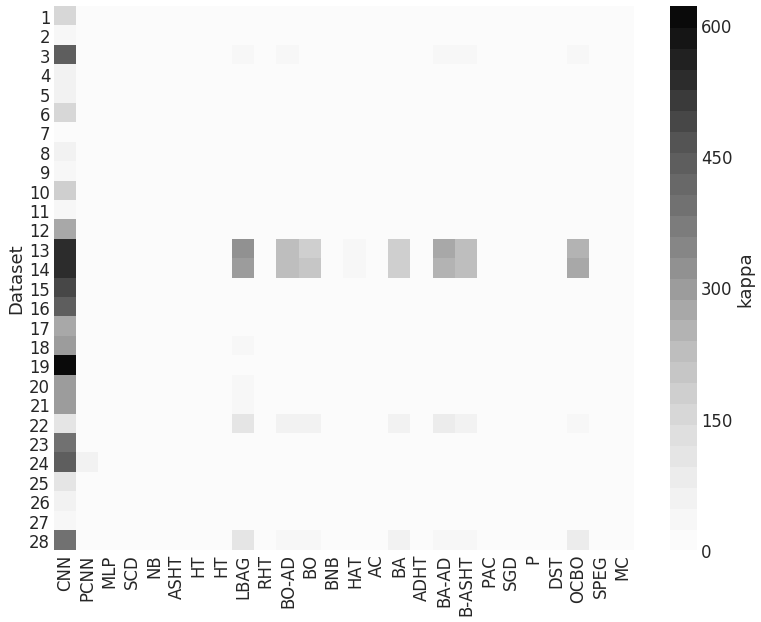

In [10]:
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig,ax = plt.subplots(figsize=(13,10))
    sns.heatmap(metrics_table_full, cmap=sns.color_palette("Greys",26), annot=False, linewidth=.0, linecolor='white', ax=ax, cbar_kws={'label': 'kappa'})
    ax.set_yticklabels(str(i) for i in range(1,len(metrics_table.index)+1))
    ax.set_xticklabels(abbr_full_ls, rotation=90, ha="right", rotation_mode="anchor", verticalalignment='center')
    ax.set_xlabel("")
    ax.set_ylabel("Dataset")
    plt.savefig("files/plots/heatmap.eps", format='eps', bbox_inches='tight')
print(len(metrics_table.index))


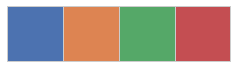

In [11]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}


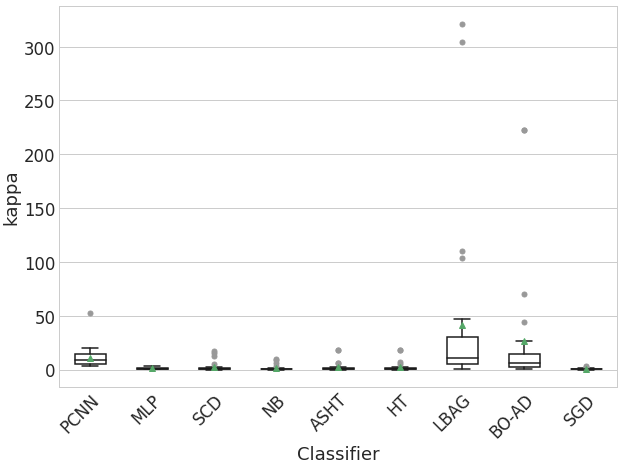

In [12]:
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(10,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('kappa')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    plt.savefig("files/plots/boxplot.eps", format='eps', bbox_inches='tight')



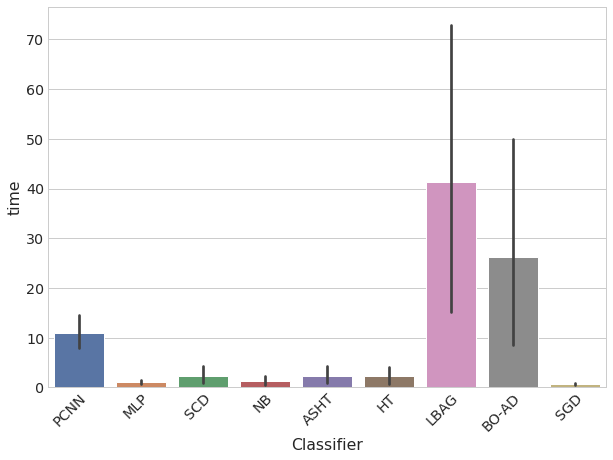

In [13]:
sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.barplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('time')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    #plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    #plt.setp(ax.lines, color='k')

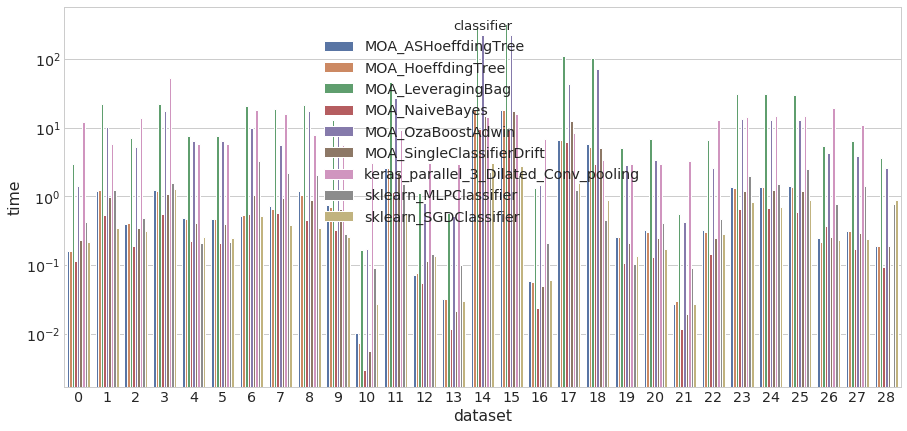

In [14]:
metrics_aux = metrics[['dataset', 'classifier', 'total_time']]
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.barplot(data=metrics_aux,  ax=ax,x='dataset', y='total_time', hue='classifier')
    ax.set_ylabel('time')
    ax.set_xticklabels(labels= list(range(29)))
    ax.set(yscale="log")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


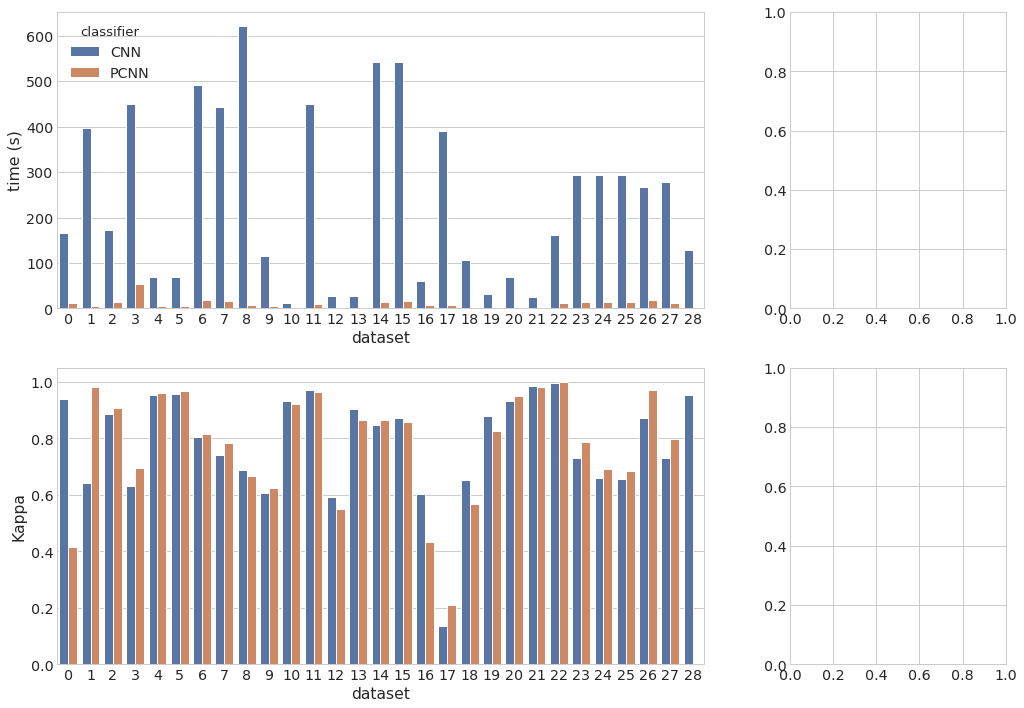

In [57]:
metrics_aux = metrics_full[metrics_full.classifier.isin(metrics_table_full.columns[:2])]
metrics_aux['classifier'] = [classifier_labels_full[clf] for clf in metrics_aux['classifier']]
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(2,2,figsize=(17,12), gridspec_kw = {'width_ratios':[3, 1]})
    sns.barplot(data=metrics_aux,  ax=ax[0][0], x='dataset', y=_METRIC, hue='classifier')
    ax[0][0].set_ylabel('time (s)')
    ax[0][0].set_xticklabels(labels= list(range(29)))
    
    
    sns.barplot(data=metrics_aux,  ax=ax[1][0], x='dataset', y='kappa', hue='classifier')
    ax[1][0].set_ylabel('Kappa')
    ax[1][0].set_xticklabels(labels= list(range(29)))
    ax[1][0].get_legend().remove()

In [56]:
metrics_aux.mean()

instances          3570.842105
attributes          452.000000
classes              11.614035
accuracy              0.842245
kappa                 0.780709
train_time_mean       0.447573
test_time_mean        0.008336
total_time_mean       0.455909
train_time          127.826492
test_time             2.579948
total_time          128.115140
timeperinstance       0.044667
minutes               2.135252
dtype: float64

In [16]:
metrics_aux = metrics_full[metrics_full.classifier.isin(metrics_table_full.columns[:2])]
metrics_aux['dataset_n'] = [datasets_dict[d] for d in metrics_aux['dataset']]
metrics_aux.sort_values('dataset_n')
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.barplot(data=metrics_aux,  ax=ax, x='dataset', y='kappa', hue='classifier')
    ax.set_ylabel('kappa')
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    #ax.set_xticklabels(labels= list(range(29)))

KeyError: 'pendigits'

In [38]:
metrics_aux = metrics_table_full[metrics_table_full.columns[:2]]
metrics_aux
metrics_aux_kappa = metrics_table_full_kappa[metrics_table_full_kappa.columns[:2][::-1]]

In [43]:
metrics_aux

classifier,keras_parallel_3_Dilated_Conv_pooling,keras_3_Dilated_Conv
dataset,,
TwoPatterns,13.101814,161.370607
TwoLeadECG,3.223873,24.190963
Mallat,9.337214,449.799926
FacesUCR,5.808412,70.202306
FaceAll,5.790452,70.080970
ChlorineConcentration,12.003190,166.852229
ItalyPowerDemand,3.032067,12.508597
Symbols,2.939049,70.136223
MoteStrain,2.905175,28.028730


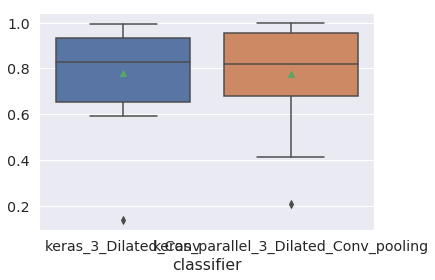

In [46]:
sns.boxplot(data=metrics_aux_kappa.iloc[:, ::-1], showmeans=True)